In [1]:
# Import necessary modules
import numpy as np
import os
import matplotlib.pyplot as plt

import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation, FFMpegWriter
from mpl_toolkits.mplot3d import Axes3D

from lid_cavity.LidDrivenCavity import LidDrivenCavity
from  lid_cavity.GridConstr import GridConstr
from lid_cavity.SimulConfig import SimulConfig
from lid_cavity.SimulResult import SimulResult
from lid_cavity.PlotConfig import PlotConfig
from lid_cavity.AnimationConfig import AnimationConfig
import lid_cavity.AnimationPlots as animplt
import lid_cavity.FramePlots as frameplt


ModuleNotFoundError: No module named 'lid_cavity'

In [4]:
Lx = 1.0                # Length of the box in x-direction
Ly = 1.0                # Length of the box in y-direction 
h = 0.025                # Space disretization 

dt = 0.001              # Time discretization
T = 5
nt = int(T/dt)          # Number of time steps 

nu = 0.1                # Kinematic Viscosity
rho = 1                 # Fluid density

# Function for smooth periodic lid velocity
#def lid_velocity(t, U0=1.0, omega = 2*np.pi):
#    return U0 * np.sin(omega * t)  


def lid_velocity(t):
    return 1


In [6]:
# Construct an instance of the simulation configuration
config = SimulConfig(Lx, Ly, h, dt, T, rho, nu, lid_velocity, verbose = True)

# Construct an instance of the grid
grid = GridConstr(config)

# Construct an instance of the simulator 
simul = LidDrivenCavity(config, grid)


Simulation Configuration for 2D lid-driven cavity flow:
--------------------------------------------------------
  Domain size: Lx = 1.0, Ly = 1.0
  Grid spacing: h = 0.025
  Grid nodes: nx = 41, ny = 41
  Final time: T = 5
  Time step: dt = 0.001
  Number of time steps: nt = 5000
  Simulation time: T = 5.0
  Fluid density: rho = 1
  Kinematic viscosity: nu = 0.1



In [9]:
# Extract the velocity [u,v] field and pressure p
SimulResult = simul.run()

  0%|          | 5/5000 [00:00<02:15, 36.91it/s]

Running simulation:


100%|██████████| 5000/5000 [00:38<00:00, 129.82it/s]


In [5]:
print(config.T)

5


In [8]:
PltConfig = PlotConfig(config, grid,  export_dir= "./Results/")
#frameplt = frameplt.FramePlots(results, PltConfig)
frameplt.plot_streamlines_frame(SimulResult, PltConfig, frame_time = 1, filename = "streamlines.png")

AttributeError: module 'lid_cavity.FramePlots' has no attribute 'plot_streamlines_frame'

KeyboardInterrupt: 

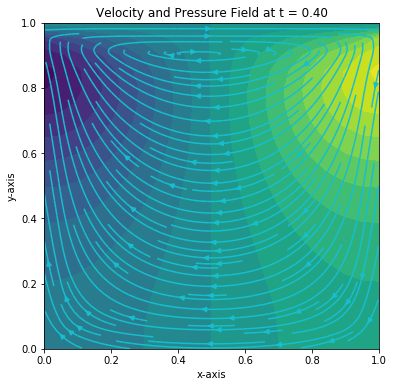

In [ ]:
def plot_solution(u, v, p, grid_x, grid_y, Lx, Ly, nt, dt, filename="animation.gif"):
    """
    Generates and saves an animated GIF showing the evolution of the velocity and pressure fields.

    Parameters:
    -----------
    u : np.ndarray
        x-component of velocity, shape (nt+1, nx+1, ny+1)
    v : np.ndarray
        y-component of velocity, shape (nt+1, nx+1, ny+1)
    p : np.ndarray
        Pressure field, shape (nt, nx+1, ny+1)
    grid_x : np.ndarray
        x-coordinates meshgrid (same shape as u[0])
    grid_y : np.ndarray
        y-coordinates meshgrid (same shape as v[0])
    Lx : float
        Width of the domain
    Ly : float
        Height of the domain
    nt : int
        Number of time steps
    dt : float
        Time step size
    filename : str
        Output filename for the animation (default: "animation.gif")
    """

    fig, ax = plt.subplots(figsize=(6, 6))

    def plot_velocity_field(u_k, v_k, p_k, k):
        ax.clear()
        # Pressure contour
        contour = ax.contourf(grid_x[::2, ::2], grid_y[::2, ::2], p_k[::2, ::2], levels=20, cmap='viridis')
        # Streamplot for velocity
        ax.streamplot(grid_x[::2, ::2], grid_y[::2, ::2], u_k[::2, ::2], v_k[::2, ::2], density=1.5, arrowsize=1, color="tab:cyan")
        ax.set_xlabel("x-axis")
        ax.set_ylabel("y-axis")
        ax.set_xlim((0, Lx))
        ax.set_ylim((0, Ly))
        ax.set_title(f"Velocity and Pressure Field at t = {k * dt:.2f}")
        return contour

    def animate(k):
        plot_velocity_field(u[k+1], v[k+1], p[k], k)

    anim = animation.FuncAnimation(fig, animate, interval=500, frames=range(0, nt, 50), repeat=False)
    
    anim.save(filename, writer="pillow")


plot_solution(
    u=SimulResult.u,
    v=SimulResult.v,
    p=SimulResult.pressure,
    grid_x=grid.grid_x,
    grid_y=grid.grid_y,
    Lx=config.Lx,
    Ly=config.Ly,
    nt=config.nt,
    dt=config.dt
)



In [19]:

def plot_streamlines(u, v, p, grid_x, grid_y, Lx, Ly, nt, dt, output_dir, filename="lid_cavity_simulation_streamlines.mp4"):
    """
    Save animation of velocity and pressure fields as an .mp4 video in a specific folder.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Full path to save the animation
    save_path = os.path.join(output_dir, filename)

    fig, ax = plt.subplots(figsize=(6, 6))

    def plot_streamline(u_k, v_k, p_k, k):
        ax.clear()
        contour = ax.contourf(grid_x[::2, ::2], grid_y[::2, ::2], p_k[::2, ::2], levels=50, cmap='viridis')
        ax.colorbar()
        #ax.quiver(grid_x[::2, ::2], grid_y[::2, ::2], u_k[::2, ::2], v_k[::2, ::2], color='black')
        ax.streamplot(grid_x[::2, ::2], grid_y[::2, ::2], u_k[::2, ::2], v_k[::2, ::2], density=1.5, arrowsize=1, color="tab:cyan")
        ax.set_xlim((0, Lx))
        ax.set_ylim((0, Ly))
        ax.set_title(f"Velocity and Pressure Field at t = {k * dt:.2f}")
        return contour

    def animate(k):
        plot_streamline(u[k+1], v[k+1], p[k], k)

    anim = FuncAnimation(fig, animate, interval=500, frames=range(0, nt, 50), repeat=False)

    writer = FFMpegWriter(fps=15, metadata=dict(artist='Your Name'), bitrate=1800)
    anim.save(save_path, writer=writer)


def plot_velocity_field(u, v, p, grid_x, grid_y, Lx, Ly, nt, dt, output_dir, filename="lid_cavity_simulation_velocity.mp4"):
    """
    Save animation of velocity and pressure fields as an .mp4 video in a specific folder.
    """
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Full path to save the animation
    save_path = os.path.join(output_dir, filename)

    fig, ax = plt.subplots(figsize=(6, 6))

    def plot_velocity(u_k, v_k, p_k, k):
        ax.clear()
        contour = ax.contourf(grid_x[::2, ::2], grid_y[::2, ::2], p_k[::2, ::2], levels=50, cmap='viridis')
        ax.colorbar()
        ax.quiver(grid_x[::2, ::2], grid_y[::2, ::2], u_k[::2, ::2], v_k[::2, ::2], color='black')
        ax.set_xlim((0, Lx))
        ax.set_ylim((0, Ly))
        ax.set_title(f"Velocity and Pressure Field at t = {k * dt:.2f}")
        return contour

    def animate(k):
        plot_velocity(u[k+1], v[k+1], p[k], k)

    anim = FuncAnimation(fig, animate, interval=500, frames=range(0, nt, 50), repeat=False)

    writer = FFMpegWriter(fps=15, metadata=dict(artist='Your Name'), bitrate=1800)
    anim.save(save_path, writer=writer)    



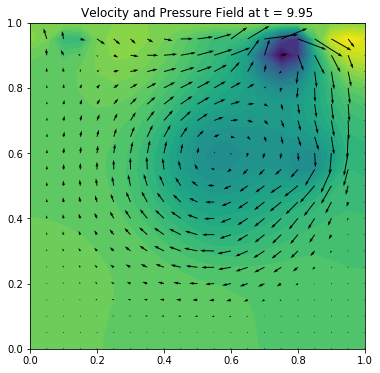

In [7]:
plot_velocity_field(
    u=results.u,
    v=results.v,
    p=results.pressure,
    grid_x=grid.grid_x,
    grid_y=grid.grid_y,
    Lx=config.Lx,
    Ly=config.Ly,
    nt=config.nt,
    dt=config.dt,
    output_dir="Results/",
    filename="lid_cavity_simulation_velocity.mp4"
)

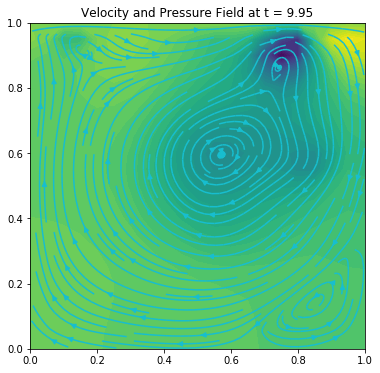

In [8]:
plot_streamlines(
    u=results.u,
    v=results.v,
    p=results.pressure,
    grid_x=grid.grid_x,
    grid_y=grid.grid_y,
    Lx=config.Lx,
    Ly=config.Ly,
    nt=config.nt,
    dt=config.dt,
    output_dir="Results/",
    filename="lid_cavity_simulation_streamlines.mp4"
)

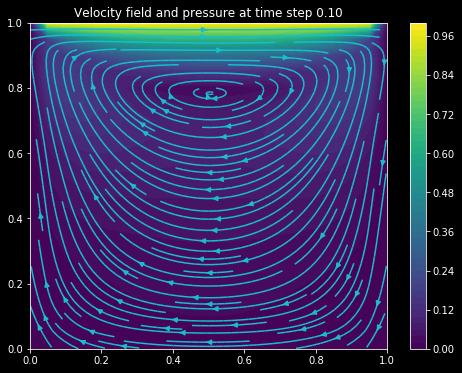

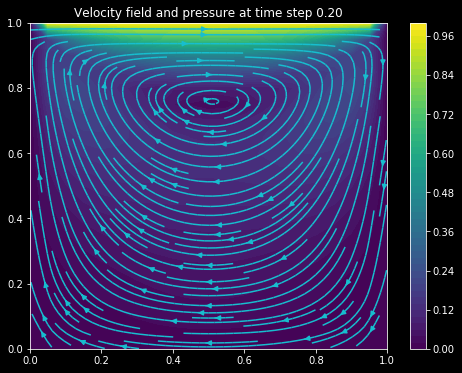

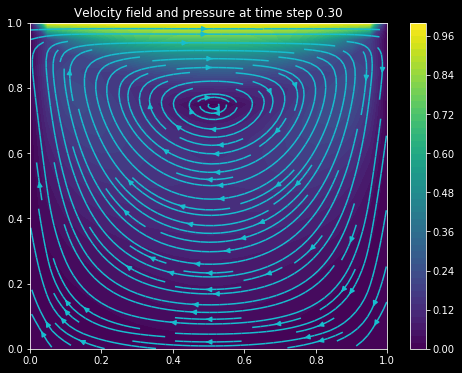

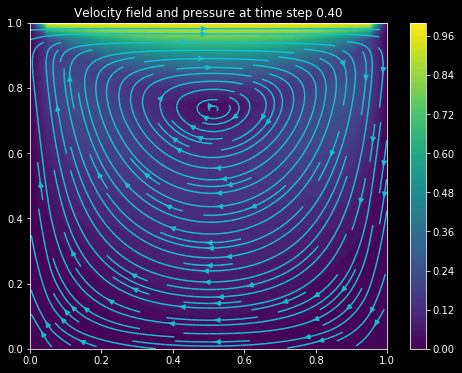

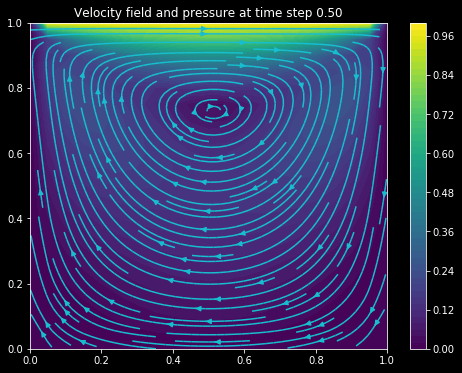

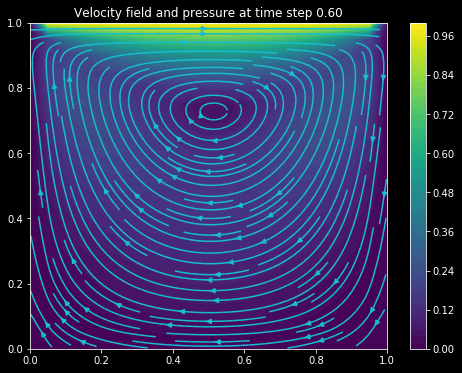

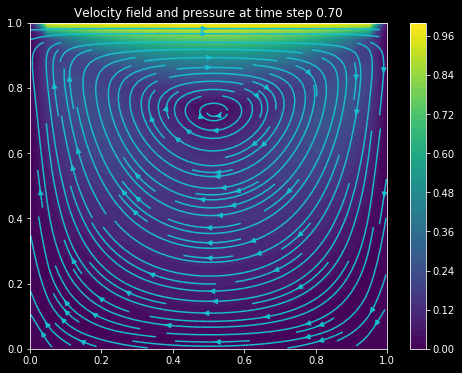

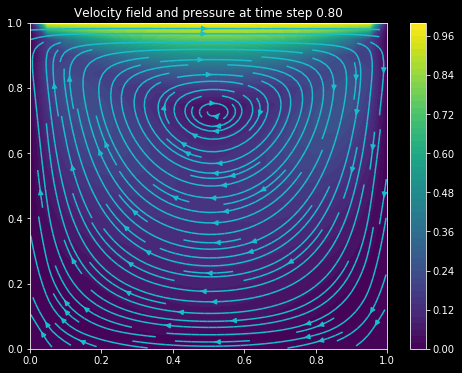

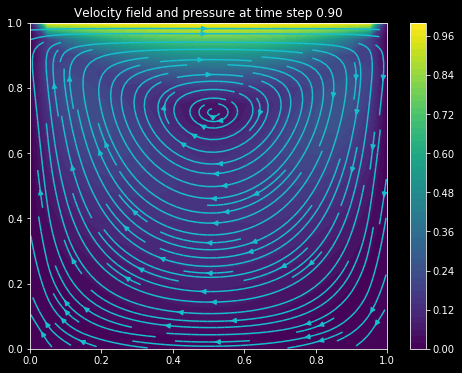

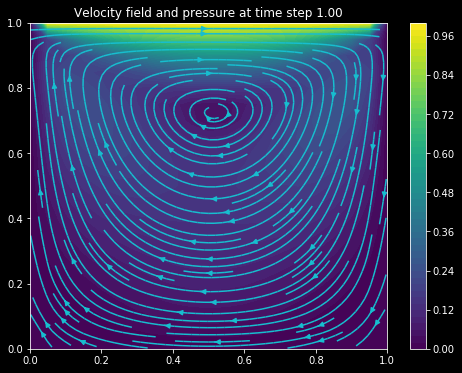

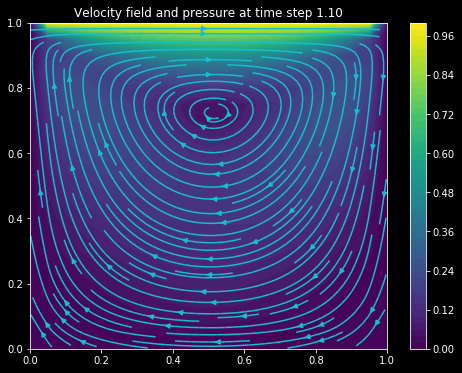

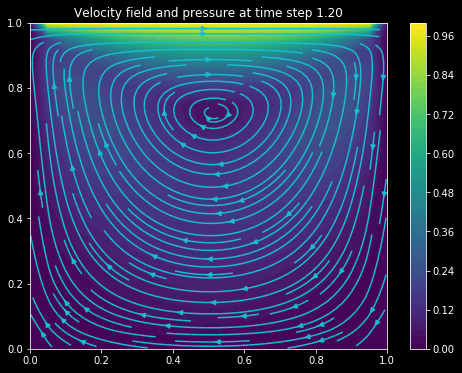

KeyboardInterrupt: 

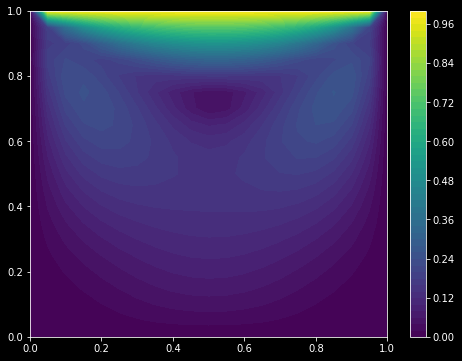

In [10]:
for n in range(1,simul.nt):
    # Plot the velocity field and pressure every 10 time steps  
    if n % 100 == 0: 

        u_n = SimulResult.u[n]
        v_n = SimulResult.v[n]
        speed_n = SimulResult.speed[n]
        p_n = SimulResult.pressure[n-1]
        curl_n = SimulResult.curl[n]

        plt.style.use("dark_background")
        plt.figure(figsize = (8,6))

        # Contour plot for the pressure
        #plt.contourf(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], p_n[::2, ::2], levels=50, cmap='viridis')

        # Contour plot for the speed
        speed = np.sqrt(  u_n**2 +  v_n**2)
        plt.contourf(grid.grid_x[::2, ::2], grid.grid_y[::2, ::2], speed_n[::2, ::2], levels = 50, cmap='viridis')
        plt.colorbar()

        #plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='black', scale=4.)
        #plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='tab:cyan', scale=4.)   
        plt.streamplot(grid.grid_x[::2, ::2], grid.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], density=1.5, arrowsize=1, color="tab:cyan")
        plt.xlim((0, config.Lx))
        plt.ylim((0, config.Ly))
        plt.title(f'Velocity field and pressure at time step {n*dt:.2f}')
        plt.show()

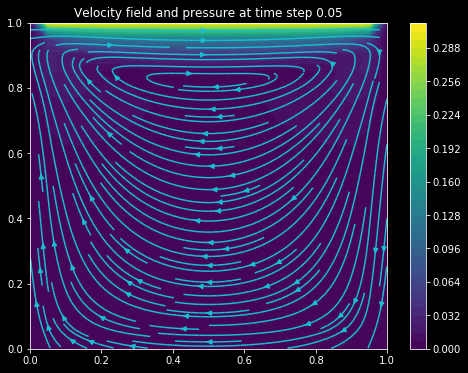

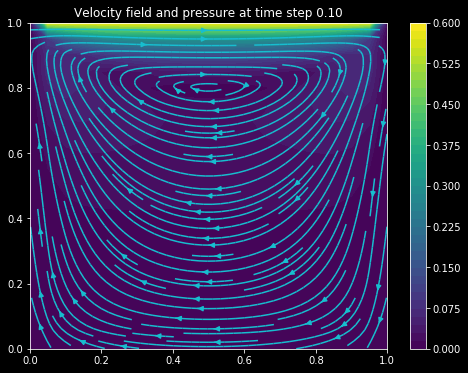

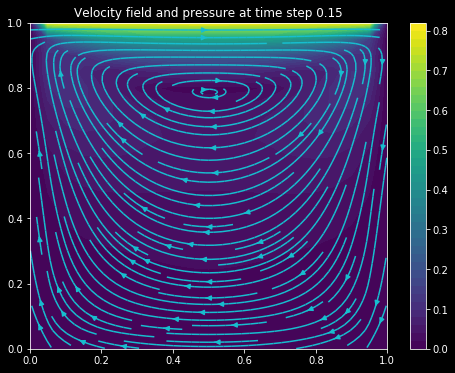

KeyboardInterrupt: 

In [7]:
for n in range(1,simul.nt):
    # Plot the velocity field and pressure every 10 time steps  
    if n % 50 == 0: 

        u_n = results.u[n]
        v_n = results.v[n]
        speed_n = results.speed[n]
        p_n = results.pressure[n-1]

        plt.style.use("dark_background")
        plt.figure(figsize = (8,6))

        # Contour plot for the pressure
        #plt.contourf(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], p_n[::2, ::2], levels=50, cmap='viridis')

        # Contour plot for the speed
        speed = np.sqrt(  u_n**2 +  v_n**2)
        plt.contourf(grid.grid_x[::2, ::2], grid.grid_y[::2, ::2], speed_n[::2, ::2], levels = 50, cmap='viridis')
        plt.colorbar()

        #plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='black', scale=4.)
        #plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='tab:cyan', scale=4.)   
        plt.streamplot(grid.grid_x[::2, ::2], grid.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], density=1.5, arrowsize=1, color="tab:cyan")
        plt.xlim((0, config.Lx))
        plt.ylim((0, config.Ly))
        plt.title(f'Velocity field and pressure at time step {n*dt:.2f}')
        plt.show()

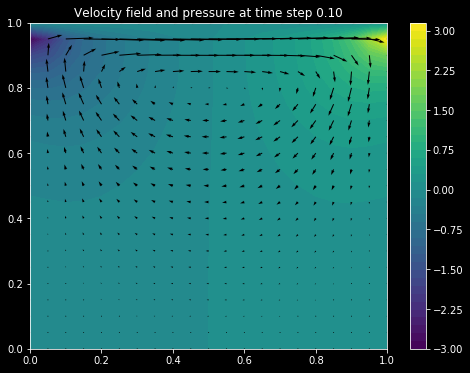

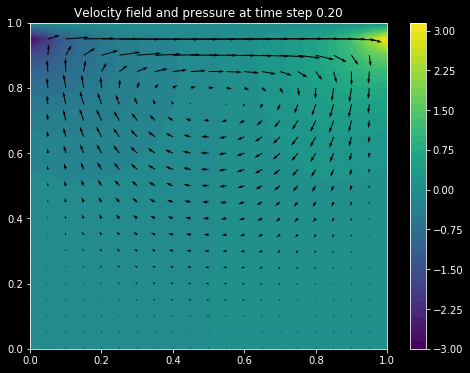

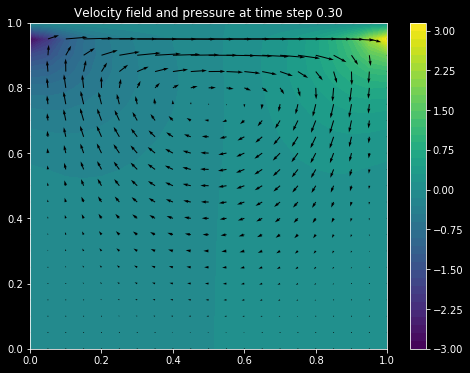

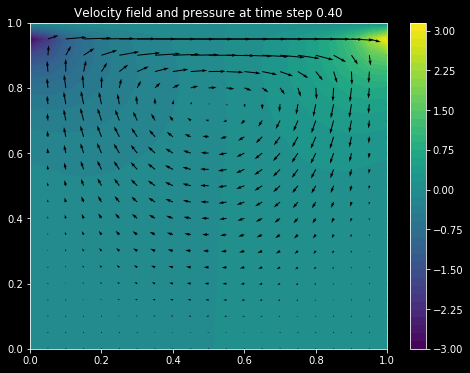

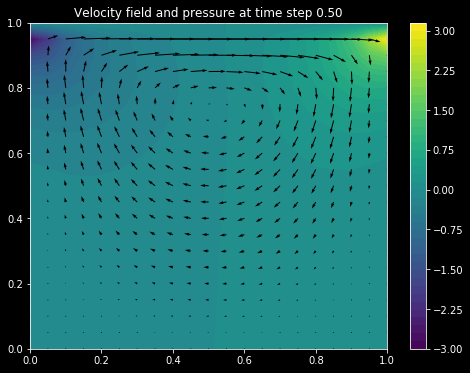

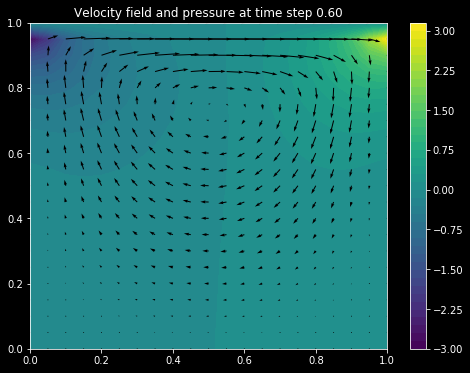

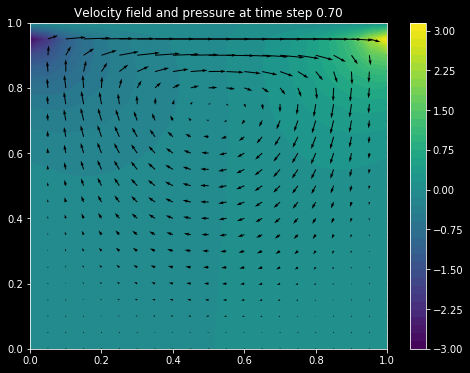

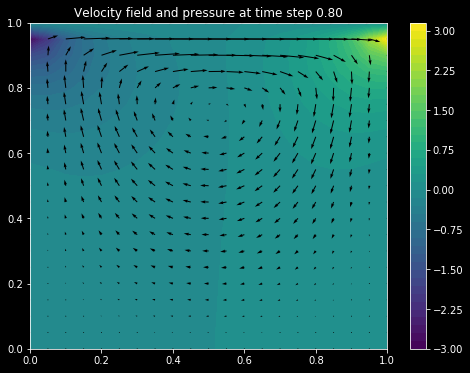

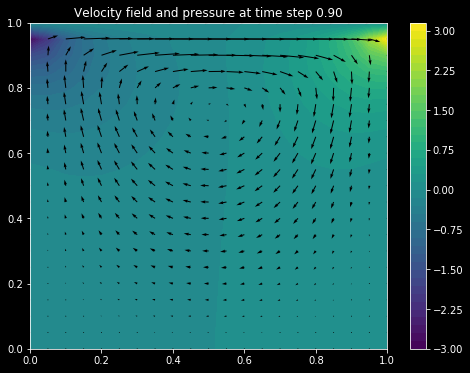

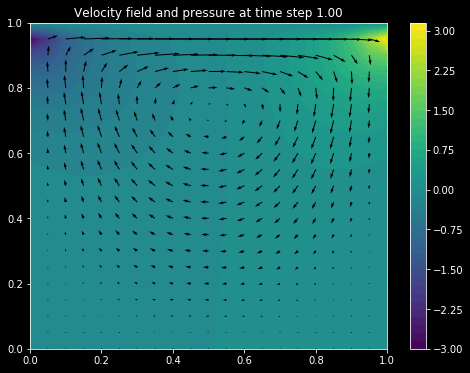

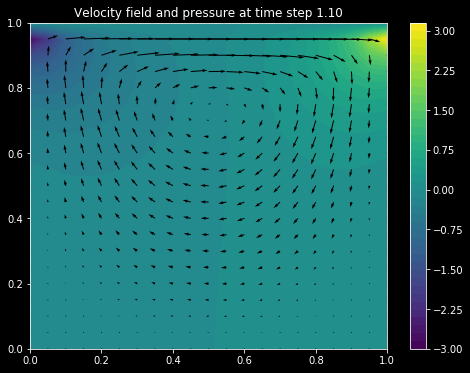

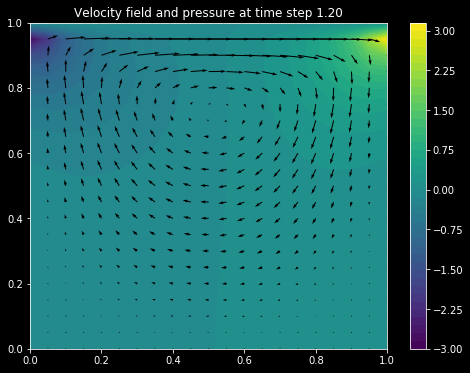

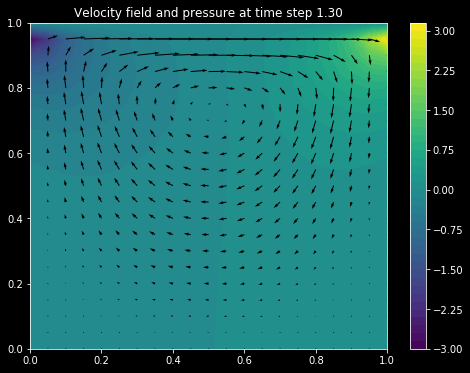

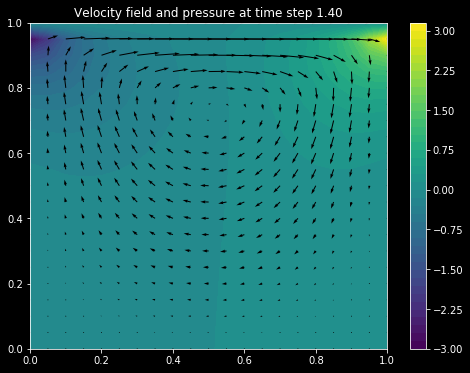

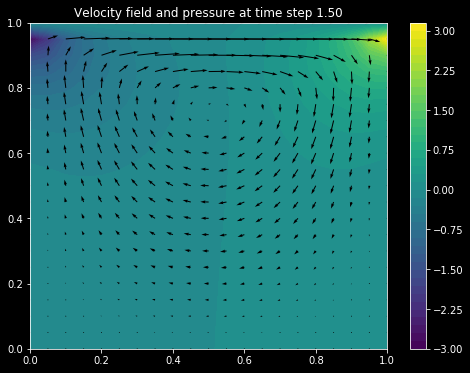

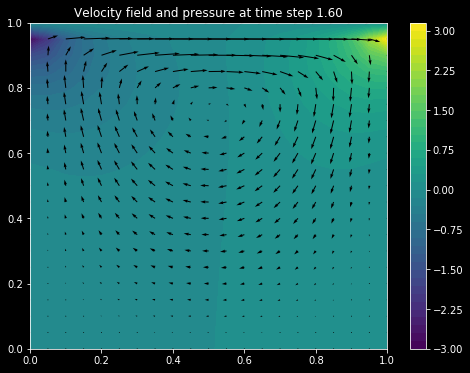

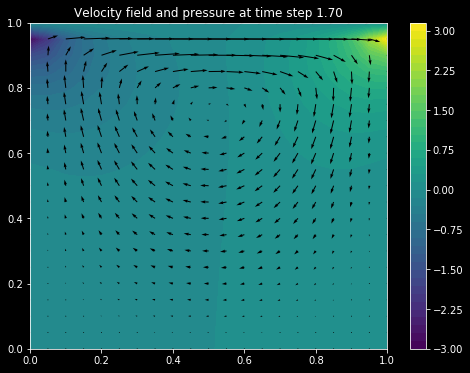

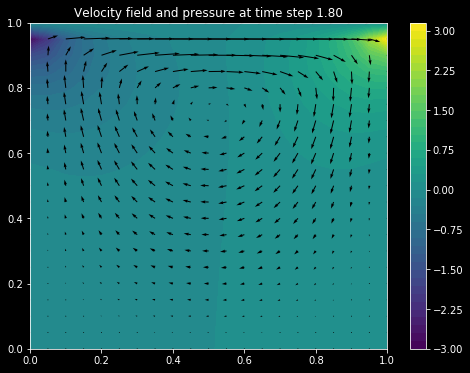

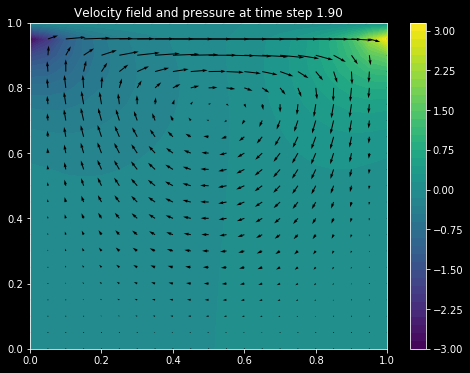

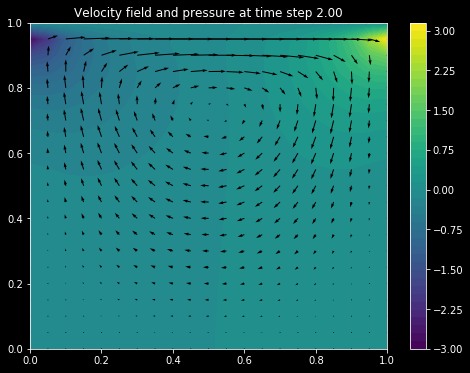

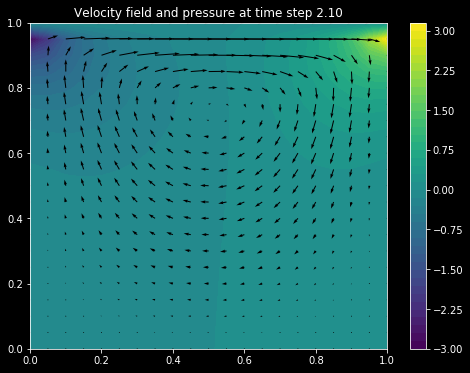

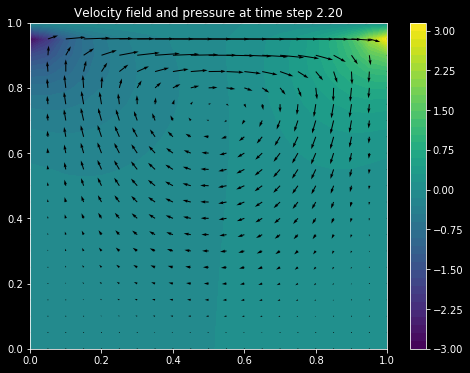

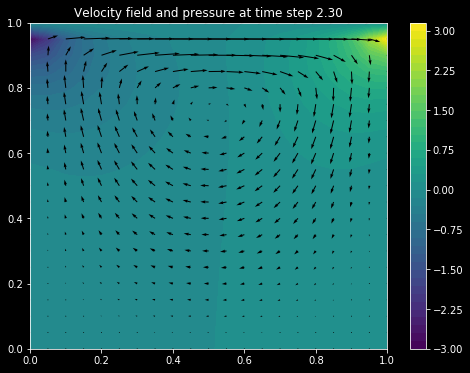

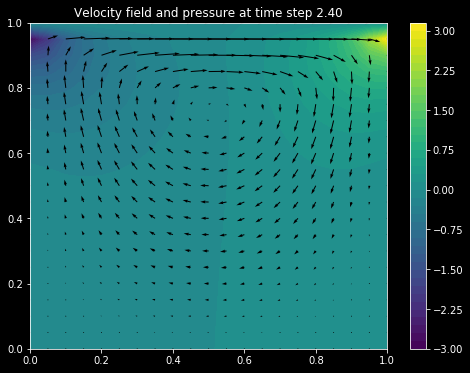

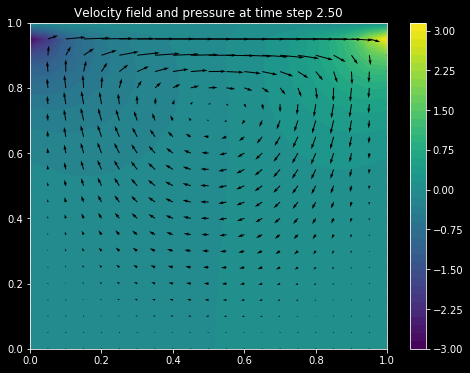

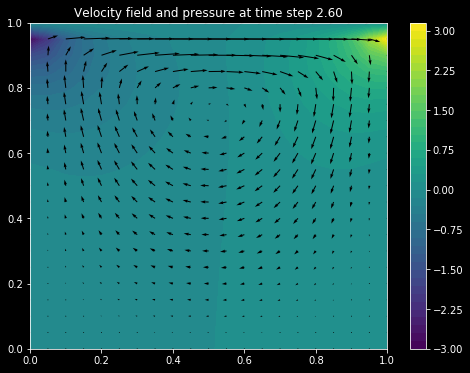

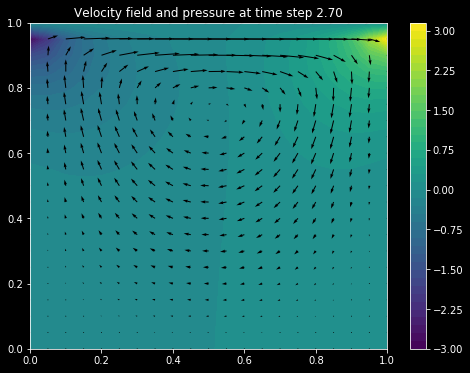

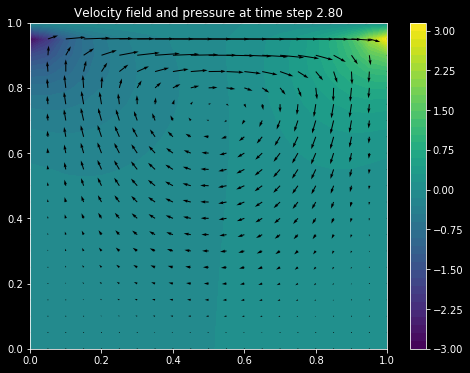

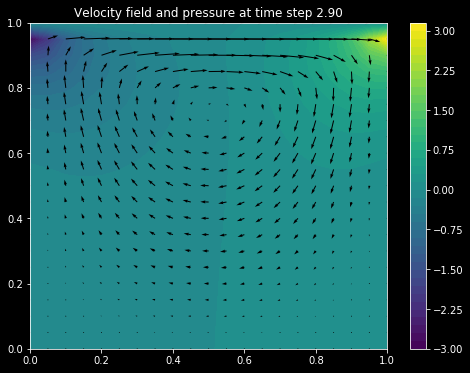

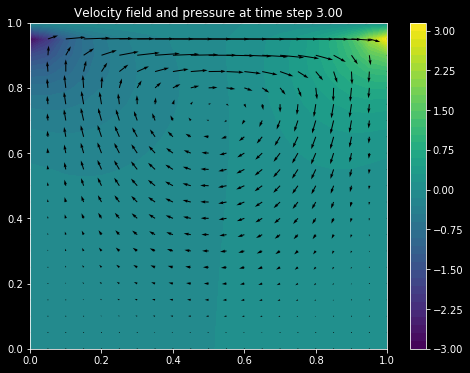

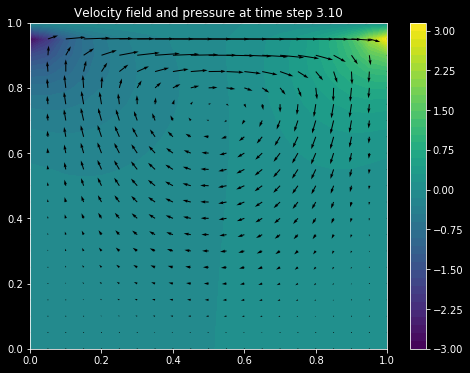

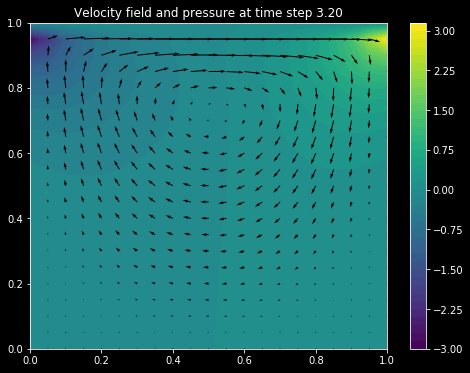

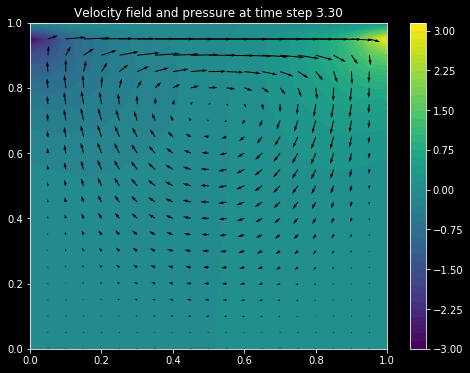

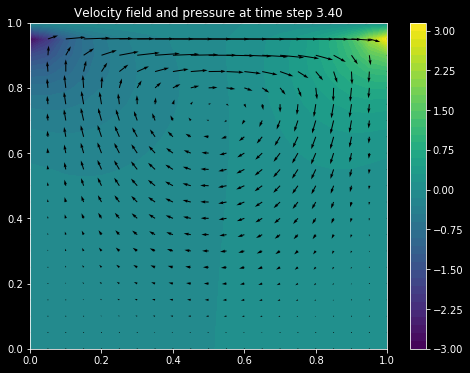

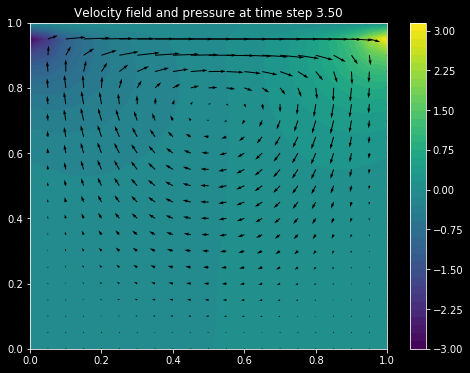

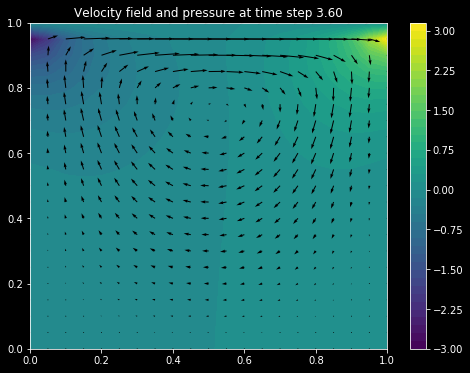

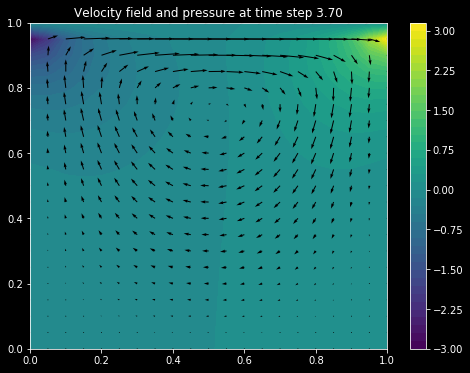

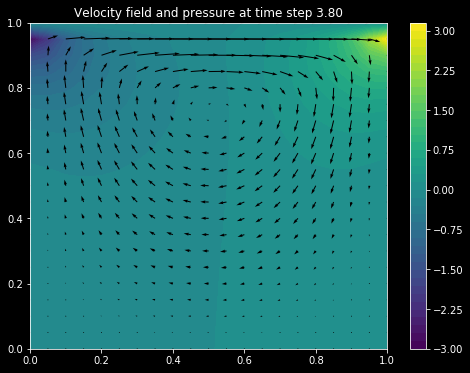

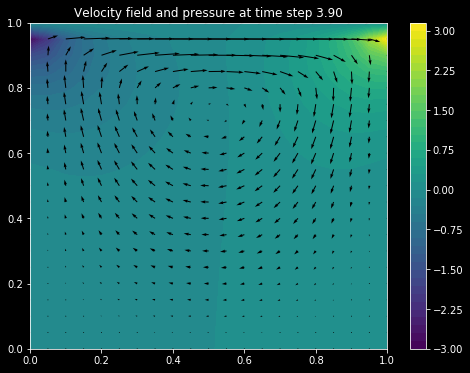

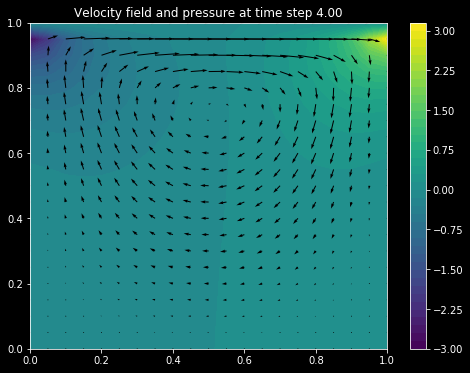

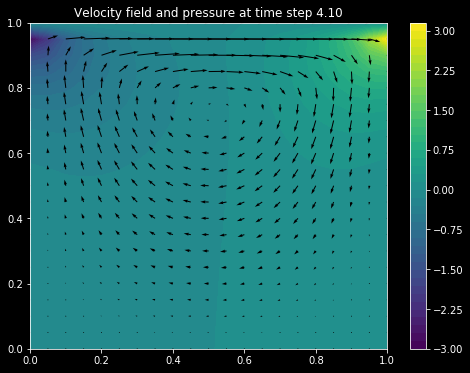

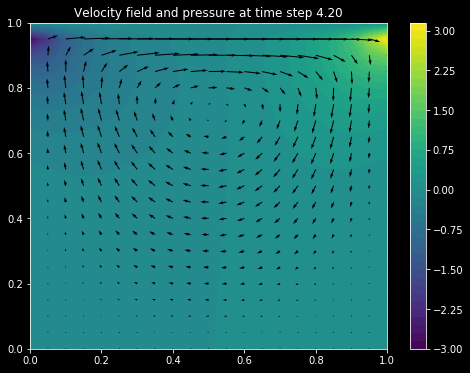

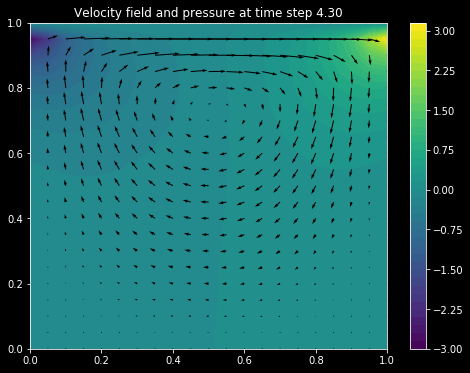

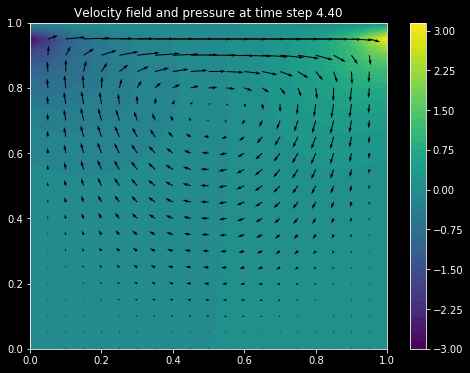

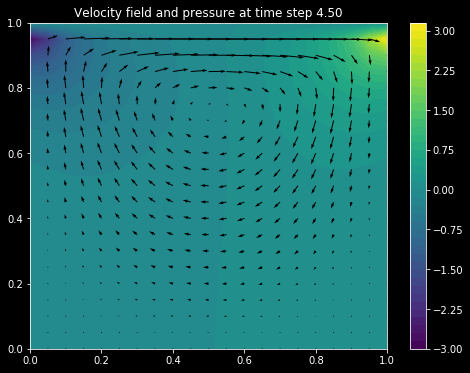

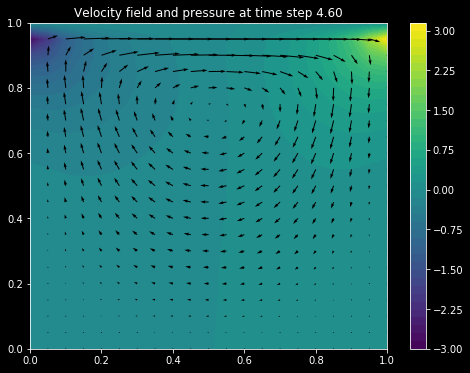

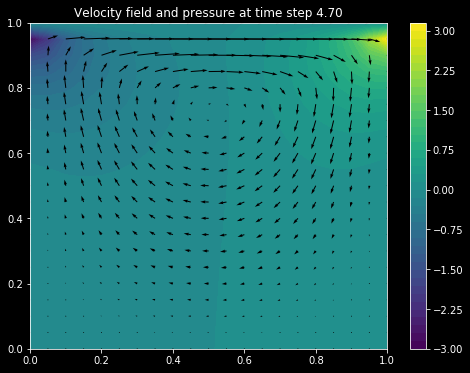

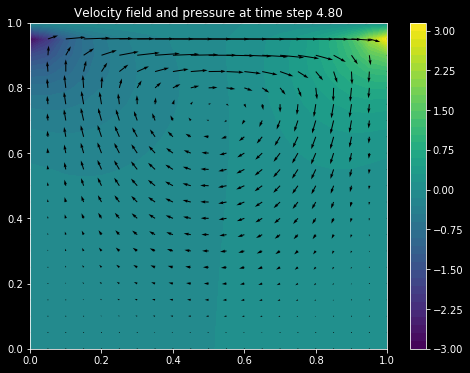

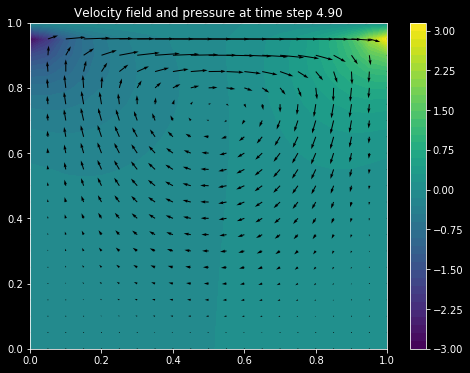

In [13]:
for n in range(1,simul.nt):
    # Plot the velocity field and pressure every 10 time steps  
    if n % 100 == 0: 

        u_n = results.u[n]
        v_n = results.v[n]
        p_n = results.pressure[n-1]

        plt.style.use("dark_background")
        plt.figure(figsize = (8,6))

        # Contour plot for the pressure
        plt.contourf(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], p_n[::2, ::2], levels=50, cmap='viridis')
        plt.colorbar()

        plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='black')
        #plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='tab:cyan', scale=4.)   
        plt.xlim((0, Lx))
        plt.ylim((0, Ly))
        plt.title(f'Velocity field and pressure at time step {n*dt:.2f}')
        plt.show()

In [14]:
for n in range(1,simul.nt):
    # Plot the velocity field and pressure every 10 time steps  
    if n % 100 == 0: 

        u_n = u[n]
        v_n = v[n]
        p_n = p[n-1]

        plt.style.use("dark_background")
        plt.figure(figsize = (8,6))

        # Contour plot for the pressure
        #plt.contourf(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], p_n[::2, ::2], levels=50, cmap='viridis')

        # Contour plot for the speed
        speed = np.sqrt(  u_n**2 +  v_n**2)
        plt.contourf(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], speed[::2, ::2], levels = 50, cmap='viridis')
        plt.colorbar()

        #plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='black', scale=4.)
        #plt.quiver(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], color='tab:cyan', scale=4.)   
        plt.streamplot(simul.grid_x[::2, ::2], simul.grid_y[::2, ::2], u_n[::2, ::2], v_n[::2, ::2], density=1.5, arrowsize=1, color="tab:cyan")
        plt.xlim((0, Lx))
        plt.ylim((0, Ly))
        plt.title(f'Velocity field and pressure at time step {n*dt:.2f}')
        plt.show()

NameError: name 'u' is not defined